In [132]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from time import time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [133]:

# Let's first load the data and take a look at what we have.
df = pd.read_csv('Heathrow_combined.csv')

In [134]:
df=df.dropna()

In [135]:
df

,Date,Nox_tropo,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,10/7/18,232.1240,59.746988,18.7,15.5,22.6,0.0,75.0,12.5,1023.9
1,11/7/18,168.0445,73.870523,18.6,13.9,23.4,0.0,45.0,10.1,1021.8
2,12/7/18,194.0030,59.394005,19.2,13.7,24.4,0.0,52.0,8.4,1021.5
3,13/7/18,343.2730,68.192323,20.6,15.7,26.8,0.0,135.0,10.1,1021.8
4,14/7/18,190.1570,78.645600,21.8,14.9,27.8,0.0,177.0,10.2,1020.0
...,...,...,...,...,...,...,...,...,...,...
772,6/1/21,85.2440,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5
773,7/1/21,163.9400,37.200143,-0.1,-1.7,2.1,0.0,277.0,10.6,1018.6
774,9/1/21,282.0585,58.818259,0.1,-2.1,2.6,0.0,178.0,6.6,1026.4
775,16/1/21,147.2020,37.496792,4.8,-0.8,8.3,0.5,214.0,14.8,1020.0


In [136]:
df.drop(['Date'], 
               axis=1,
              inplace=True)


In [137]:
from sklearn.model_selection import train_test_split

In [138]:
y = df['Nox_tropo'].values

In [139]:
X = df.drop(['Nox_tropo'], axis=1).values

# LSTM

In [140]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [141]:

 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [142]:
df

,Nox_tropo,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,232.1240,59.746988,18.7,15.5,22.6,0.0,75.0,12.5,1023.9
1,168.0445,73.870523,18.6,13.9,23.4,0.0,45.0,10.1,1021.8
2,194.0030,59.394005,19.2,13.7,24.4,0.0,52.0,8.4,1021.5
3,343.2730,68.192323,20.6,15.7,26.8,0.0,135.0,10.1,1021.8
4,190.1570,78.645600,21.8,14.9,27.8,0.0,177.0,10.2,1020.0
...,...,...,...,...,...,...,...,...,...
772,85.2440,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5
773,163.9400,37.200143,-0.1,-1.7,2.1,0.0,277.0,10.6,1018.6
774,282.0585,58.818259,0.1,-2.1,2.6,0.0,178.0,6.6,1026.4
775,147.2020,37.496792,4.8,-0.8,8.3,0.5,214.0,14.8,1020.0


In [143]:
dataset = df
values = dataset.values

In [144]:
dataset.values

array([[2.32124000e+02, 5.97469878e+01, 1.87000000e+01, ...,
        7.50000000e+01, 1.25000000e+01, 1.02390000e+03],
       [1.68044500e+02, 7.38705230e+01, 1.86000000e+01, ...,
        4.50000000e+01, 1.01000000e+01, 1.02180000e+03],
       [1.94003000e+02, 5.93940048e+01, 1.92000000e+01, ...,
        5.20000000e+01, 8.40000000e+00, 1.02150000e+03],
       ...,
       [2.82058500e+02, 5.88182587e+01, 1.00000000e-01, ...,
        1.78000000e+02, 6.60000000e+00, 1.02640000e+03],
       [1.47202000e+02, 3.74967921e+01, 4.80000000e+00, ...,
        2.14000000e+02, 1.48000000e+01, 1.02000000e+03],
       [7.46270000e+01, 3.76059383e+01, 5.30000000e+00, ...,
        2.69000000e+02, 1.28000000e+01, 1.02360000e+03]])

In [145]:
df

,Nox_tropo,Nox_ground,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,232.1240,59.746988,18.7,15.5,22.6,0.0,75.0,12.5,1023.9
1,168.0445,73.870523,18.6,13.9,23.4,0.0,45.0,10.1,1021.8
2,194.0030,59.394005,19.2,13.7,24.4,0.0,52.0,8.4,1021.5
3,343.2730,68.192323,20.6,15.7,26.8,0.0,135.0,10.1,1021.8
4,190.1570,78.645600,21.8,14.9,27.8,0.0,177.0,10.2,1020.0
...,...,...,...,...,...,...,...,...,...
772,85.2440,40.983786,3.2,0.1,5.6,0.5,89.0,11.3,1019.5
773,163.9400,37.200143,-0.1,-1.7,2.1,0.0,277.0,10.6,1018.6
774,282.0585,58.818259,0.1,-2.1,2.6,0.0,178.0,6.6,1026.4
775,147.2020,37.496792,4.8,-0.8,8.3,0.5,214.0,14.8,1020.0


In [146]:
encoder = LabelEncoder()

# ensure all data is float
values[:,4] = encoder.fit_transform(values[:,4])
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[10,11,12,13,14,15,16,17,]], axis=1, inplace=True)
# print(reframed.head())

In [147]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t)
1,0.435560,0.143119,0.657439,0.821429,0.734513,0.000000,0.182663,0.252101,0.660969,0.347648
2,0.347648,0.181692,0.653979,0.757937,0.765487,0.000000,0.089783,0.184874,0.631054,0.383261
3,0.383261,0.142155,0.674740,0.750000,0.809735,0.000000,0.111455,0.137255,0.626781,0.588048
4,0.588048,0.166184,0.723183,0.829365,0.889381,0.000000,0.368421,0.184874,0.631054,0.377984
5,0.377984,0.194734,0.764706,0.797619,0.915929,0.000000,0.498452,0.187675,0.605413,0.486563
...,...,...,...,...,...,...,...,...,...,...
576,0.180355,0.048106,0.121107,0.281746,0.035398,0.000000,0.000000,0.358543,0.606838,0.234052
577,0.234052,0.091874,0.121107,0.210317,0.066372,0.014706,0.226006,0.218487,0.598291,0.342017
578,0.342017,0.081541,0.006920,0.138889,0.000000,0.000000,0.808050,0.198880,0.585470,0.504066
579,0.504066,0.140583,0.013841,0.123016,0.013274,0.000000,0.501548,0.086835,0.696581,0.319053


In [148]:
reframed.head(5)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t)
1,0.435560,0.143119,0.657439,0.821429,0.734513,0.0,0.182663,0.252101,0.660969,0.347648
2,0.347648,0.181692,0.653979,0.757937,0.765487,0.0,0.089783,0.184874,0.631054,0.383261
3,0.383261,0.142155,0.674740,0.750000,0.809735,0.0,0.111455,0.137255,0.626781,0.588048
4,0.588048,0.166184,0.723183,0.829365,0.889381,0.0,0.368421,0.184874,0.631054,0.377984
5,0.377984,0.194734,0.764706,0.797619,0.915929,0.0,0.498452,0.187675,0.605413,0.486563


In [149]:

# split into train and test sets
values = reframed.values

#70% training data
n_train_hours = 406
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(406, 1, 9) (406,) (174, 1, 9) (174,)


In [100]:
train_X.shape[2]

9

Train on 406 samples, validate on 174 samples
Epoch 1/50
 - 2s - loss: 0.2562 - val_loss: 0.1288
Epoch 2/50
 - 0s - loss: 0.1377 - val_loss: 0.0732
Epoch 3/50
 - 0s - loss: 0.1058 - val_loss: 0.0863
Epoch 4/50
 - 0s - loss: 0.1065 - val_loss: 0.0809
Epoch 5/50
 - 0s - loss: 0.0989 - val_loss: 0.0701
Epoch 6/50
 - 0s - loss: 0.0953 - val_loss: 0.0662
Epoch 7/50
 - 0s - loss: 0.0940 - val_loss: 0.0658
Epoch 8/50
 - 0s - loss: 0.0917 - val_loss: 0.0660
Epoch 9/50
 - 0s - loss: 0.0895 - val_loss: 0.0655
Epoch 10/50
 - 0s - loss: 0.0878 - val_loss: 0.0643
Epoch 11/50
 - 0s - loss: 0.0863 - val_loss: 0.0635
Epoch 12/50
 - 0s - loss: 0.0849 - val_loss: 0.0633
Epoch 13/50
 - 0s - loss: 0.0837 - val_loss: 0.0622
Epoch 14/50
 - 0s - loss: 0.0828 - val_loss: 0.0624
Epoch 15/50
 - 0s - loss: 0.0821 - val_loss: 0.0626
Epoch 16/50
 - 0s - loss: 0.0816 - val_loss: 0.0624
Epoch 17/50
 - 0s - loss: 0.0811 - val_loss: 0.0623
Epoch 18/50
 - 0s - loss: 0.0807 - val_loss: 0.0631
Epoch 19/50
 - 0s - loss: 0

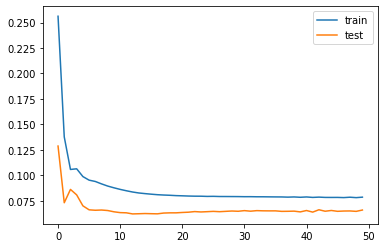

In [150]:

# design network
model = Sequential()
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [102]:
from math import sqrt

In [103]:
test_X

array([[[0.22600264, 0.32470812, 0.2733564 , ..., 0.59133127,
         0.37815126, 0.22364672]],

       [[0.43460241, 0.47554698, 0.17647059, ..., 0.73684211,
         0.08683473, 0.40883191]],

       [[0.33132872, 0.25718367, 0.26989619, ..., 0.15170279,
         0.18767507, 0.47150997]],

       ...,

       [[0.3420167 , 0.08154088, 0.00692042, ..., 0.80804954,
         0.19887955, 0.58547009]],

       [[0.50406638, 0.14058262, 0.01384083, ..., 0.50154799,
         0.08683473, 0.6965812 ]],

       [[0.31905343, 0.08235107, 0.17647059, ..., 0.6130031 ,
         0.31652661, 0.60541311]]])

In [151]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

print("Mean absolute error: %.2f"
      % mean_absolute_error(inv_y,inv_yhat))

Test RMSE: 62.347
Mean absolute error: 48.12


In [ ]:
#  Tuning finding neurons

In [72]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasRegressor

In [77]:
def create_model(n_neurons=1):
    #create model
    model = Sequential()
 
    model.add(LSTM(n_neurons,input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # Compile model
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model


# define the grid search parameters
neurons=[5,6,7,8,9, 10, 15, 20, 25, 30, 35,40,64,128,256]
model = KerasRegressor(build_fn = create_model, epochs = 100, batch_size = 10, verbose = 0)
#this does 3-fold classification. One can change k. 
param_grid = dict(n_neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(train_X, train_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.013123 using {'n_neurons': 64}
-0.014199 (0.004914) with: {'n_neurons': 5}
-0.013920 (0.004838) with: {'n_neurons': 6}
-0.013828 (0.004082) with: {'n_neurons': 7}
-0.014158 (0.004408) with: {'n_neurons': 8}
-0.013660 (0.004153) with: {'n_neurons': 9}
-0.013877 (0.003956) with: {'n_neurons': 10}
-0.014615 (0.005070) with: {'n_neurons': 15}
-0.013827 (0.004333) with: {'n_neurons': 20}
-0.013955 (0.003999) with: {'n_neurons': 25}
-0.013371 (0.004076) with: {'n_neurons': 30}
-0.014322 (0.003971) with: {'n_neurons': 35}
-0.014225 (0.004962) with: {'n_neurons': 40}
-0.013123 (0.003988) with: {'n_neurons': 64}
-0.015248 (0.003206) with: {'n_neurons': 128}
-0.013558 (0.004406) with: {'n_neurons': 256}


<!-- Tuning finding batch size and epoch -->

In [78]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD
from keras.constraints import maxnorm
##############################################################
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
##############################################################
# load dataset
import pandas as pd

input_dim = 8 # number of columns
print(input_dim) # 23


# Function to create model, required for KerasClassifier
def create_model():
    # default values
    activation='relu' # or linear
    dropout_rate=0.0 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    optimizer='adam' # or SGD
    lr = 0.01
    momemntum=0
    # create model
    model = Sequential()

    model.add(LSTM(64,input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    # Compile model
    model.compile(loss='mean_squared_error', 
                  optimizer=optimizer, 
               
                  )
    return model

# create model
model = KerasRegressor(build_fn=create_model, batch_size=100, epochs=100) 
# use verbose=0 if you do not want to see progress

########################################################
# Use scikit-learn to grid search 
activation =  ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] # softmax, softplus, softsign 
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
weight_constraint=[1, 2, 3, 4, 5]
neurons = [1, 5, 10, 15, 20, 25, 30]
sizes = [1, 5, 10, 15, 20, 25, 30]

init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
##############################################################
# grid search epochs, batch size
epochs = [50,100,150,200] # add 50, 100, 150 etc
batch_size = [50,60,70,80,100 ] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,scoring='neg_mean_squared_error')
grid_result = grid.fit(train_X, train_y) 
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

8
Epoch 1/200
406/406 [==============================] - 1s 4ms/step - loss: 0.0981
Epoch 2/200
406/406 [==============================] - 0s 76us/step - loss: 0.0587
Epoch 3/200
406/406 [==============================] - 0s 64us/step - loss: 0.0339
Epoch 4/200
406/406 [==============================] - 0s 87us/step - loss: 0.0220
Epoch 5/200
406/406 [==============================] - 0s 56us/step - loss: 0.0186
Epoch 6/200
406/406 [==============================] - 0s 52us/step - loss: 0.0192
Epoch 7/200
406/406 [==============================] - 0s 52us/step - loss: 0.0198
Epoch 8/200
406/406 [==============================] - 0s 52us/step - loss: 0.0191
Epoch 9/200
406/406 [==============================] - 0s 51us/step - loss: 0.0180
Epoch 10/200
406/406 [==============================] - 0s 54us/step - loss: 0.0174
Epoch 11/200
406/406 [==============================] - 0s 57us/step - loss: 0.0174
Epoch 12/200
406/406 [==============================] - 0s 51us/step - loss: 0.0174


406/406 [==============================] - 0s 51us/step - loss: 0.0130
Epoch 99/200
406/406 [==============================] - 0s 51us/step - loss: 0.0130
Epoch 100/200
406/406 [==============================] - 0s 50us/step - loss: 0.0131
Epoch 101/200
406/406 [==============================] - 0s 51us/step - loss: 0.0129
Epoch 102/200
406/406 [==============================] - 0s 54us/step - loss: 0.0129
Epoch 103/200
406/406 [==============================] - 0s 51us/step - loss: 0.0129
Epoch 104/200
406/406 [==============================] - 0s 50us/step - loss: 0.0129
Epoch 105/200
406/406 [==============================] - 0s 50us/step - loss: 0.0130
Epoch 106/200
406/406 [==============================] - 0s 52us/step - loss: 0.0131
Epoch 107/200
406/406 [==============================] - 0s 54us/step - loss: 0.0129
Epoch 108/200
406/406 [==============================] - 0s 50us/step - loss: 0.0130
Epoch 109/200
406/406 [==============================] - 0s 53us/step - loss: 0.

406/406 [==============================] - 0s 65us/step - loss: 0.0125
Epoch 195/200
406/406 [==============================] - 0s 69us/step - loss: 0.0131
Epoch 196/200
406/406 [==============================] - 0s 59us/step - loss: 0.0127
Epoch 197/200
406/406 [==============================] - 0s 54us/step - loss: 0.0127
Epoch 198/200
406/406 [==============================] - 0s 57us/step - loss: 0.0127
Epoch 199/200
406/406 [==============================] - 0s 76us/step - loss: 0.0126
Epoch 200/200
406/406 [==============================] - 0s 80us/step - loss: 0.0126
Best: -0.013895 using {'batch_size': 80, 'epochs': 200}
-0.013941 (0.004952) with: {'batch_size': 50, 'epochs': 50}
-0.013944 (0.004664) with: {'batch_size': 50, 'epochs': 100}
-0.014222 (0.004362) with: {'batch_size': 50, 'epochs': 150}
-0.014034 (0.004427) with: {'batch_size': 50, 'epochs': 200}
-0.014154 (0.004794) with: {'batch_size': 60, 'epochs': 50}
-0.013993 (0.004841) with: {'batch_size': 60, 'epochs': 100}

Best: -0.013895 using {'batch_size': 80, 'epochs': 200}

In [153]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [155]:
mean_absolute_percentage_error( inv_yhat,inv_y)

36.51818741637405